#PRE

In [82]:
import pandas as pd
import numpy as np
!pip install statsmodels -q
# !pip install pandasai
# from pandasai import PandasAI
from sklearn.model_selection import train_test_split

In [83]:
Train = pd.read_csv('/content/sample_data/california_housing_train.csv')
Test = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [84]:
df= Train

In [85]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [86]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [87]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [88]:
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']].copy()
y = df[['median_house_value']]

In [89]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [90]:
X.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
dtype: object

In [121]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Residual Analysis

In [122]:
from sklearn.metrics import mean_squared_error
from scipy.stats import norm

# Fit the GBM model using the training data
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr.predict(X_test)

# Convert y_pred to a 1D array if it has multiple dimensions
y_pred = np.squeeze(y_pred)

# Convert y_test to a 1D array or a list
y_test = y_test.values.ravel()  # if y_test is a Pandas Series
# or
y_test = y_test.tolist()  # if y_test is an array-like object

# Calculate the residuals
residuals = y_test - y_pred


# Calculate the residuals
residuals = y_test - y_pred

# Estimate the standard deviation of the residuals
residual_std = np.std(residuals)

# Define the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the multiplier for the confidence interval
multiplier = np.abs(norm.ppf((1 - confidence_level) / 2))

# Construct the prediction interval
lower_bounds = y_pred - multiplier * residual_std
upper_bounds = y_pred + multiplier * residual_std

# Evaluate the model performance on the test data
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")

# Print the confidence intervals for each data point in the test data
for i in range(10):
    print(f"Data Point: {i}   |   {y_pred[i]:.4f}  |   Confidence Interval: [{lower_bounds[i]:.4f}, {upper_bounds[i]:.4f}]")

Mean Squared Error on Test Data: 2961085995.820911
Data Point: 0   |   163063.8839  |   Confidence Interval: [56433.9463, 269693.8214]
Data Point: 1   |   443134.3788  |   Confidence Interval: [336504.4413, 549764.3163]
Data Point: 2   |   102815.6703  |   Confidence Interval: [-3814.2672, 209445.6078]
Data Point: 3   |   153706.1840  |   Confidence Interval: [47076.2465, 260336.1216]
Data Point: 4   |   138546.0206  |   Confidence Interval: [31916.0831, 245175.9581]
Data Point: 5   |   266143.1345  |   Confidence Interval: [159513.1970, 372773.0721]
Data Point: 6   |   173621.4440  |   Confidence Interval: [66991.5065, 280251.3815]
Data Point: 7   |   155708.8052  |   Confidence Interval: [49078.8676, 262338.7427]
Data Point: 8   |   382287.1811  |   Confidence Interval: [275657.2436, 488917.1186]
Data Point: 9   |   254335.7763  |   Confidence Interval: [147705.8388, 360965.7138]


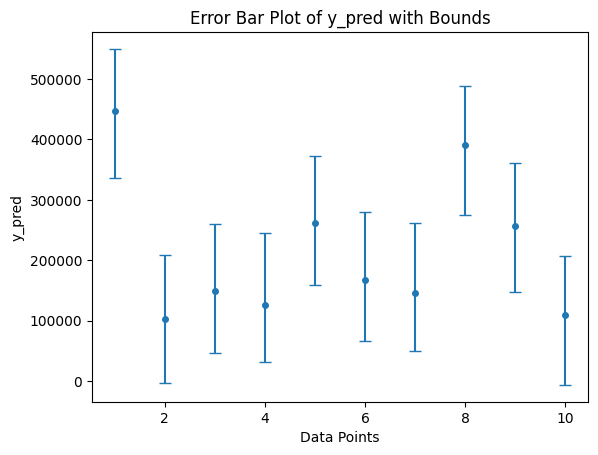

In [123]:
y_pred = y_pred_bootstrap[1:11]
lower_bound = lower_bounds[1:11]
upper_bound = upper_bounds[1:11]

# Create an array of x values for the data points
x = np.arange(1, 11)

# Plotting the error bar plot
plt.errorbar(x, y_pred, yerr=[y_pred - lower_bound, upper_bound - y_pred], fmt='o', markersize=4, capsize=4)

plt.xlabel('Data Points')
plt.ylabel('y_pred')
plt.title('Error Bar Plot of y_pred with Bounds')
plt.show()

#Quantile Regression

In [65]:
# Fit gradient boosting regressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Define quantile levels for quantile regression
quantiles = [0.025, 0.975]  # 2.5% and 97.5% quantiles for 95% confidence interval

# Perform quantile regression for each quantile level
y_pred = gbr.predict(X_test)  # Prediction for original data
lower_bound = []
upper_bound = []
for quantile in quantiles:
    quant_reg = sm.QuantReg(y_test, sm.add_constant(X_test))
    quantiles_results = quant_reg.fit(q=quantile)

    # Predict using the quantile regression results
    X_test_const = sm.add_constant(X_test)
    y_pred_test = quantiles_results.predict(X_test_const)

    lower_bound.append(y_pred_test)
    upper_bound.append(y_pred_test)

# Convert the lists to arrays
lower_bound = np.array(lower_bound).T
upper_bound = np.array(upper_bound).T

# Print the predictions and confidence intervals
for i in range(10):
    print(f"Data Point: {i}   |   Prediction: {y_pred[i]}   |   Confidence Interval: [{lower_bound[i, 0]}, {upper_bound[i, 1]}]")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Data Point: 0   |   Prediction: 163063.883863982   |   Confidence Interval: [75098.91719034401, 259540.88322840276]
Data Point: 1   |   Prediction: 443134.37878094346   |   Confidence Interval: [256436.87322331915, 554809.341590738]
Data Point: 2   |   Prediction: 102815.67029696392   |   Confidence Interval: [43919.75594778401, 200478.89646246884]
Data Point: 3   |   Prediction: 153706.18403960727   |   Confidence Interval: [104710.21003751596, 277230.14438336785]
Data Point: 4   |   Prediction: 138546.02061048997   |   Confidence Interval: [63426.66990128198, 349269.5156444492]
Data Point: 5   |   Prediction: 266143.1345287821   |   Confidence Interval: [168654.57912557267, 464066.5467162463]
Data Point: 6   |   Prediction: 173621.44398858937   |   Confidence Interval: [79007.10614778605, 333666.4812939257]
Data Point: 7   |   Prediction: 155708.80515352832   |   Confidence Interval: [67369.10479876585, 335583.9658372315]
Data Point: 8   |   Prediction: 382287.1810774893   |   Confid

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


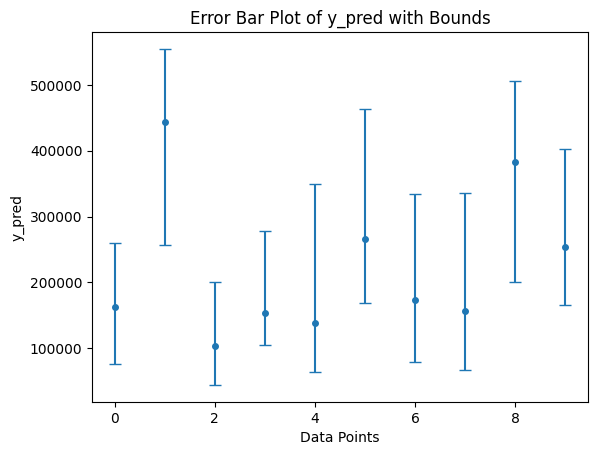

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# # Assuming you have the y_pred, lower_bound, and upper_bound values for the first 10 data points
y_pred = y_pred[:10]
lower_bound = lower_bound[:10,0]
upper_bound = upper_bound[:10,1]

# Create an array of x values for the data points
x = np.arange(10)

# Plotting the error bar plot
plt.errorbar(x, y_pred, yerr=[y_pred - lower_bound, upper_bound - y_pred],
             fmt='o', markersize=4, capsize=4)

plt.xlabel('Data Points')
plt.ylabel('y_pred')
plt.title('Error Bar Plot of y_pred with Bounds')
plt.show()


#Bootstrapping

In [71]:
import warnings

# Filter out warnings
warnings.filterwarnings("ignore")
# Restore default warning behavior
# warnings.filterwarnings("default")

In [ ]:
from sklearn.metrics import mean_squared_error

# Convert DataFrame to NumPy array
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()

# Fit the GBM model using the training data
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Define the number of bootstrap iterations
n_iterations = 1000

# Define the quantiles for confidence interval
lower_quantile = 0.025  # 2.5% quantile
upper_quantile = 0.975  # 97.5% quantile

# Perform bootstrapping
prediction_intervals = []
for _ in range(n_iterations):
    # Create a bootstrap sample by randomly sampling with replacement
    indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_bootstrap = X_train[indices]
    y_bootstrap = y_train[indices]

    # Train a new GBM model using the bootstrap sample
    gbr_bootstrap = GradientBoostingRegressor()
    gbr_bootstrap.fit(X_bootstrap, y_bootstrap)

    # Make predictions on the test data using the bootstrap model
    y_pred_bootstrap = gbr_bootstrap.predict(X_test)

    # Store the predictions for each data point
    prediction_intervals.append(y_pred_bootstrap)

# Calculate the lower and upper quantiles across all iterations
lower_bounds = np.quantile(prediction_intervals, lower_quantile, axis=0)
upper_bounds = np.quantile(prediction_intervals, upper_quantile, axis=0)

# Evaluate the model performance on the test data
y_pred_mean = np.mean(prediction_intervals, axis=0)
mse = mean_squared_error(y_test, y_pred_mean)
print(f"Mean Squared Error on Test Data: {mse}")

# Print the confidence intervals for each data point in the test data
for i in range(10):
    print(f"Data Point: {i}   |  {y_pred_bootstrap[i]}  |   Confidence Interval: [{lower_bounds[i]}, {upper_bounds[i]}]")


In [109]:
# Print the confidence intervals for each data point in the test data
for i in range(10):
    print(f"Data Point: {i}   |  {y_pred_bootstrap[i]:.4f}  |   Confidence Interval: [{lower_bounds[i]:.4f}, {upper_bounds[i]:.4f}]")

Data Point: 0   |  151215.5756  |   Confidence Interval: [152435.1577, 178198.5391]
Data Point: 1   |  447611.2797  |   Confidence Interval: [428515.6855, 462793.4238]
Data Point: 2   |  102173.1720  |   Confidence Interval: [88616.5980, 115253.1954]
Data Point: 3   |  149142.8982  |   Confidence Interval: [134175.5996, 159596.8413]
Data Point: 4   |  125713.5180  |   Confidence Interval: [122449.9410, 150664.7889]
Data Point: 5   |  262370.4940  |   Confidence Interval: [248277.9078, 281899.2990]
Data Point: 6   |  168037.2495  |   Confidence Interval: [157246.5196, 176770.9223]
Data Point: 7   |  145817.6384  |   Confidence Interval: [142187.4667, 164309.4633]
Data Point: 8   |  390456.7752  |   Confidence Interval: [363615.2063, 404812.0099]
Data Point: 9   |  256988.6028  |   Confidence Interval: [243211.7531, 266305.7122]


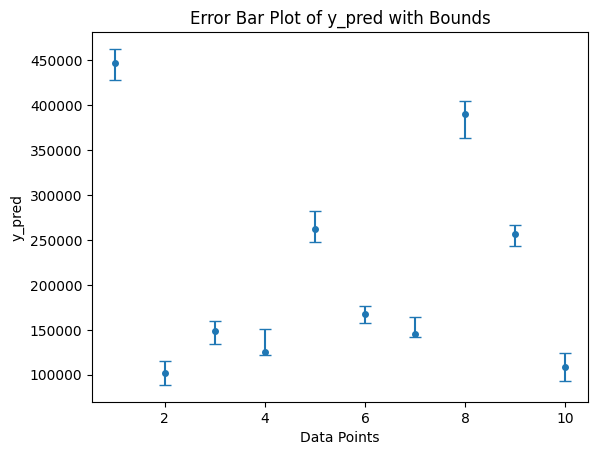

In [114]:
y_pred = y_pred_bootstrap[1:11]
lower_bound = lower_bounds[1:11]
upper_bound = upper_bounds[1:11]

# Create an array of x values for the data points
x = np.arange(1, 11)

# Plotting the error bar plot
plt.errorbar(x, y_pred, yerr=[y_pred - lower_bound, upper_bound - y_pred], fmt='o', markersize=4, capsize=4)

plt.xlabel('Data Points')
plt.ylabel('y_pred')
plt.title('Error Bar Plot of y_pred with Bounds')
plt.show()

#MAPIE